# Install and Import Libraries

In [35]:
!pip install torch torchvision
!pip install ultralytics

In [40]:
import os
import random
import numpy as np 
import pandas as pd 

from matplotlib import pyplot as plt
import cv2
from PIL import Image

import torch
from torch import nn
from ultralytics import YOLO

import torch
import glob

# Exploring Data
## Show original images before detection

In [3]:
img_dir = '/data/train/images'

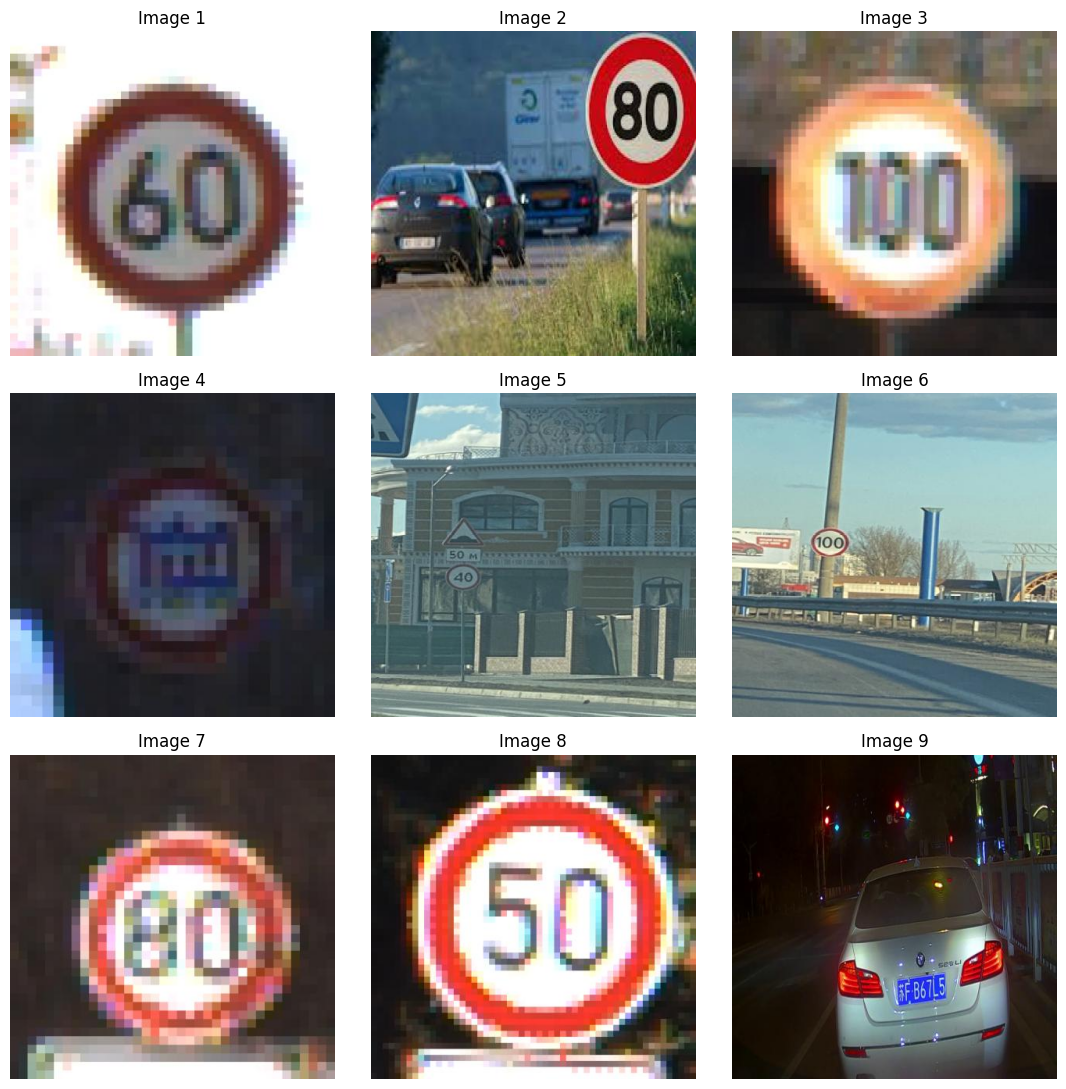

In [4]:
num_samples = 9
img_files = os.listdir(img_dir)

# Randomly select num_samples images
rand_images = random.sample(img_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    img = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(img_dir, img)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
random_image_file = random.choice(img_files)
random_image_path = os.path.join(img_dir, random_image_file)
with Image.open(random_image_path) as img:
    width, height = img.size
    
print(f"Size: {width}x{height}")

Size: 416x416


# Load YOLOv8 for Traffic Signs Detection

Test for the rangom image

In [6]:
model = YOLO("yolov8m.pt") 

100%|██████████| 49.7M/49.7M [00:00<00:00, 276MB/s]



image 1/1 /kaggle/input/cardetection/train/images/000096_jpg.rf.6ee3946f06df5359e8a4b6ecd632bda9.jpg: 416x416 (no detections), 10.4ms
Speed: 8.9ms preprocess, 10.4ms inference, 60.5ms postprocess per image at shape (1, 3, 416, 416)


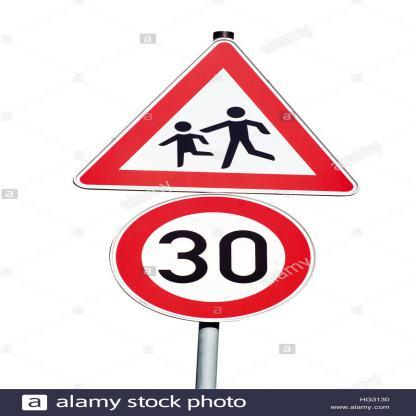

In [7]:
image = random.choice(img_files)
image_path = os.path.join(img_dir, image)
result_predict = model.predict(source=image_path, imgsz=(width, height))

plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# Train YOLOv8-Based Model

In [8]:
final_model = YOLO('yolov8m.pt')

In [9]:
hist = final_model.train(data='/data/data.yaml',
                         epochs=30,
                         imgsz=640)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/cardetection/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]
2024-06-11 17:29:40,356	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-11 17:29:41,133	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 119MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:13<00:00, 257.46it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 257.65it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.05G     0.8351       2.49      1.174         20        640: 100%|██████████| 221/221 [02:18<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]

                   all        801        944      0.365      0.497      0.389      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      8.88G      0.781      1.581      1.113         13        640: 100%|██████████| 221/221 [02:15<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.554      0.539      0.546      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.87G     0.7792      1.405      1.117         20        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944       0.71      0.573      0.664      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.97G     0.7458      1.281        1.1         29        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        801        944      0.771      0.681      0.738      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.96G     0.7287      1.148      1.086         31        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.907      0.676      0.822      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.87G      0.705      1.054      1.069         16        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.831      0.793      0.852      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.96G     0.6821     0.9969      1.052         22        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.882      0.794      0.875      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.96G     0.6542     0.9106      1.046         13        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        801        944      0.887      0.812      0.895      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.96G     0.6505     0.8769      1.039         23        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.888      0.853      0.907      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.909      0.842      0.919      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.97G     0.6297     0.7936      1.026         20        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.906      0.874      0.925      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.97G     0.6167     0.7754      1.025         21        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.935      0.871      0.939      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.97G     0.6103     0.7511       1.02         22        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.936      0.875      0.938      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.87G     0.6011     0.7334      1.008         25        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.933       0.87      0.933      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      8.76G      0.595     0.6909      1.005         27        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.928      0.903      0.951      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      8.98G      0.585     0.6804      1.001         13        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.953       0.88      0.946      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      8.96G     0.5771     0.6605     0.9982         28        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944       0.95      0.882      0.946      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      8.87G     0.5678     0.6657     0.9959         18        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.928      0.914      0.958      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      8.76G     0.5682     0.6336      0.995         18        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944       0.95      0.911      0.961      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      8.97G     0.5592     0.6124     0.9874         21        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944       0.96      0.908      0.961      0.826


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      8.97G     0.5527     0.3747     0.9622         12        640: 100%|██████████| 221/221 [02:15<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.938      0.916      0.959      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      8.87G     0.5445     0.3746      0.952         18        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.948      0.914      0.958      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      8.96G     0.5343     0.3505     0.9489         12        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.932      0.919      0.959      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      8.98G     0.5207     0.3302     0.9435         10        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944      0.942      0.932      0.967      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      8.97G     0.5211     0.3246     0.9337         12        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.943      0.933      0.964      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      8.87G     0.5124     0.3131     0.9391         10        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944      0.952      0.922      0.964      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      8.97G     0.5003     0.3024     0.9322         15        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        801        944       0.95      0.937      0.965      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.97G     0.4924     0.2928     0.9187         10        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        801        944       0.95      0.939      0.967      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.96G     0.4832     0.2818     0.9196         12        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        801        944      0.955       0.94      0.967      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.87G      0.479     0.2733     0.9172         13        640: 100%|██████████| 221/221 [02:14<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        801        944      0.956       0.94      0.967      0.843



30 epochs completed in 1.230 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]


                   all        801        944      0.955       0.94      0.967      0.843
           Green Light         87        122      0.888      0.803      0.879      0.534
             Red Light         74        108      0.819      0.824      0.831      0.538
       Speed Limit 100         52         52      0.981          1      0.993      0.911
       Speed Limit 110         17         17       0.93      0.941      0.947      0.891
       Speed Limit 120         60         60      0.978          1      0.995      0.932
        Speed Limit 20         56         56      0.979      0.982      0.987      0.869
        Speed Limit 30         71         74      0.953      0.973      0.991      0.921
        Speed Limit 40         53         55      0.962      0.982      0.991      0.887
        Speed Limit 50         68         71          1      0.929      0.984       0.89
        Speed Limit 60         76         76      0.987      0.934      0.985      0.897
        Speed Limit 7

In [32]:
final_model.save('model.pt')

# Evaluation

In [10]:
metrics = final_model.val()

Ultralytics YOLOv8.2.31 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 218 layers, 25848445 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /kaggle/input/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 825.27it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]


                   all        801        944      0.956       0.94      0.967      0.846
           Green Light         87        122       0.89      0.803      0.877      0.538
             Red Light         74        108      0.821      0.824      0.831      0.545
       Speed Limit 100         52         52      0.981          1      0.993      0.915
       Speed Limit 110         17         17       0.93      0.941      0.947      0.897
       Speed Limit 120         60         60      0.978          1      0.995      0.937
        Speed Limit 20         56         56      0.979      0.982      0.987      0.874
        Speed Limit 30         71         74      0.953      0.973      0.991      0.923
        Speed Limit 40         53         55      0.962      0.982      0.991      0.885
        Speed Limit 50         68         71          1      0.928      0.984      0.891
        Speed Limit 60         76         76      0.987      0.934      0.985      0.893
        Speed Limit 7

In [11]:
metrics = ["P_curve", "R_curve", "F1_curve", "confusion_matrix", "results"]

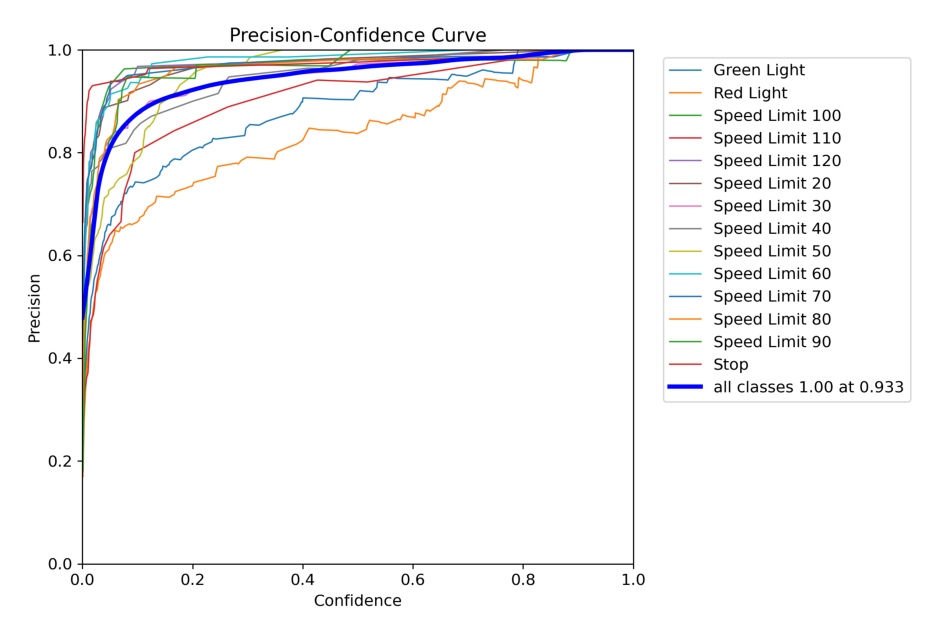

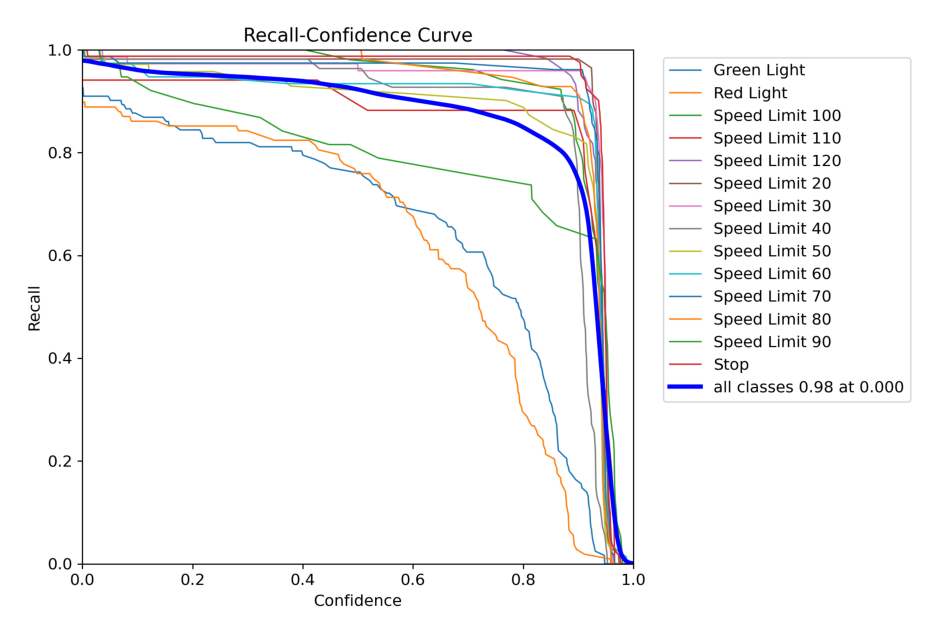

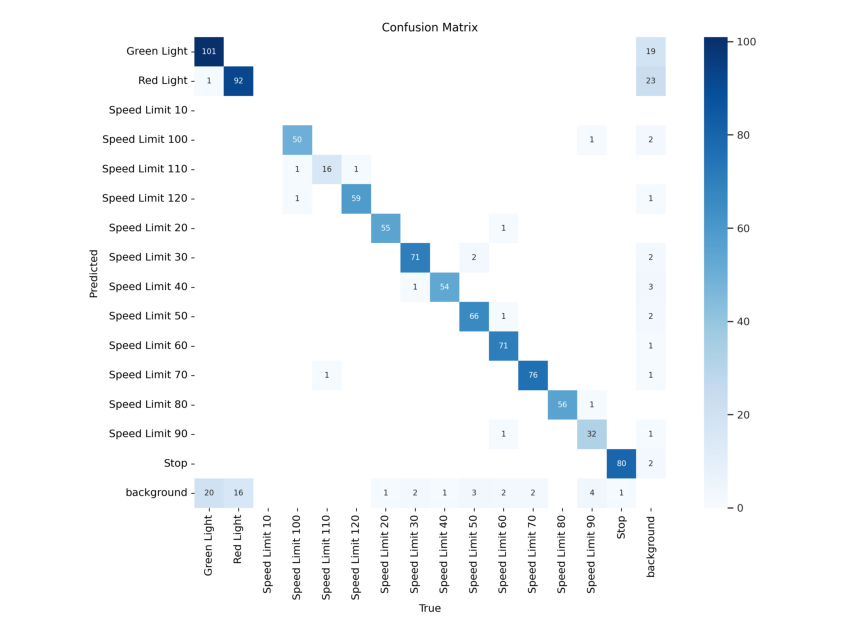

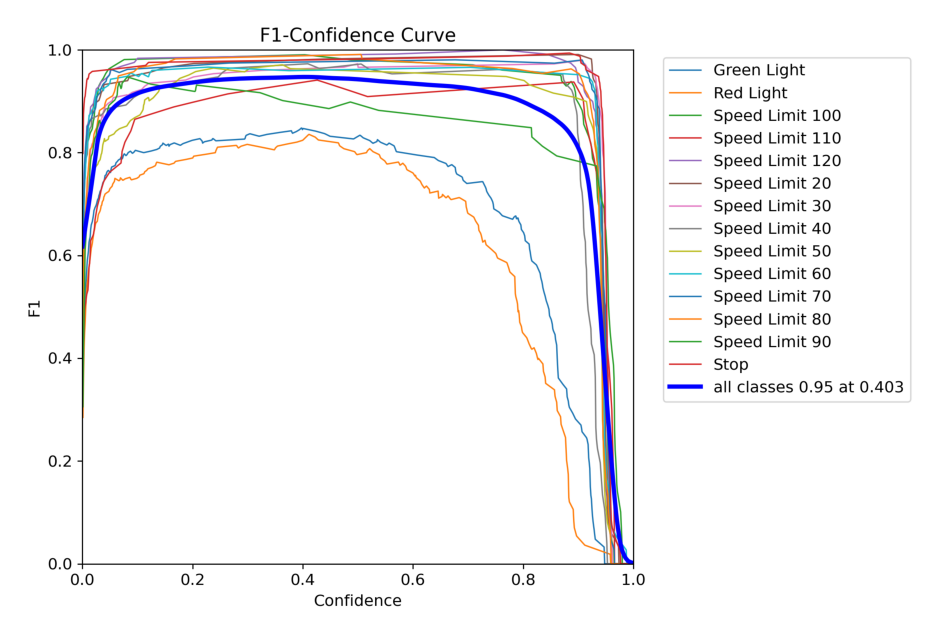

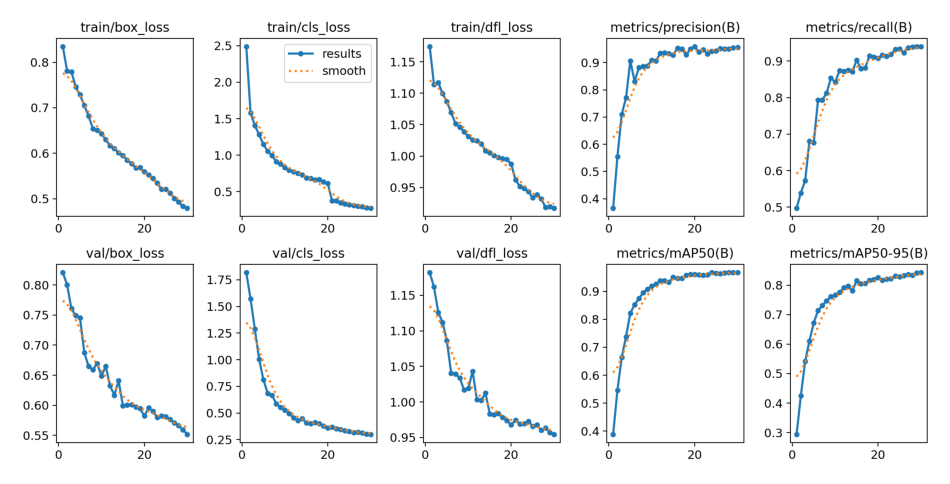

In [12]:
for i in metrics:
    image = Image.open(f'/runs/detect/train/{i}.png')
   
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(image)
    plt.show()

# Prediction

In [96]:
test_imgs = '/data/test/images'

In [97]:
test_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

random_test_imgs = random.sample(test_files, 10)

for img_path in random_test_imgs:
    image = cv2.imread(img_path)
    results = final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)


0: 416x416 1 Speed Limit 40, 10.7ms
Speed: 3.0ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train43

0: 416x416 1 Speed Limit 40, 10.3ms
Speed: 0.8ms preprocess, 10.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train44

0: 416x416 1 Speed Limit 80, 10.2ms
Speed: 0.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train45

0: 416x416 (no detections), 10.3ms
Speed: 1.3ms preprocess, 10.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train46

0: 416x416 (no detections), 10.2ms
Speed: 0.8ms preprocess, 10.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train47

0: 416x416 1 Speed Limit 70, 10.3ms
Speed: 0.8ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved

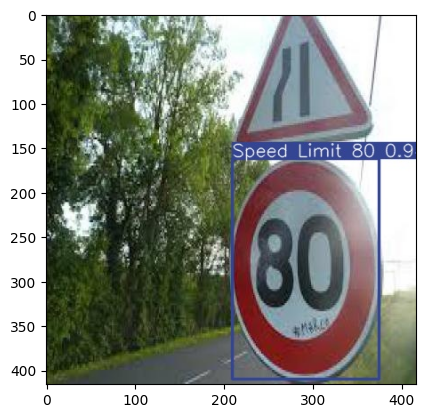

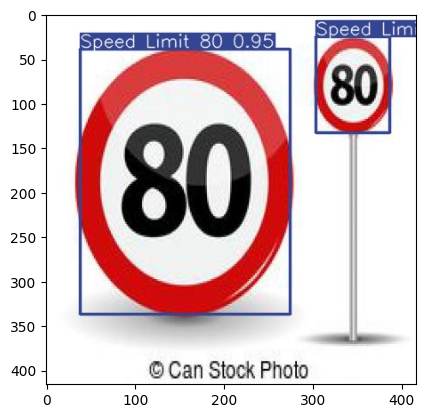

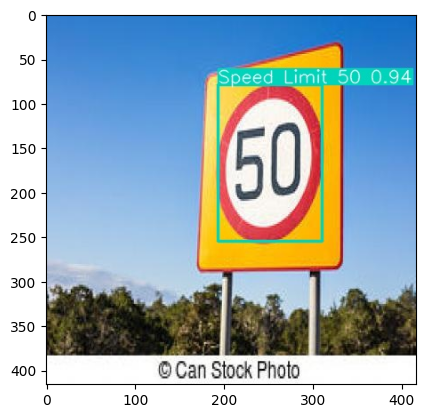

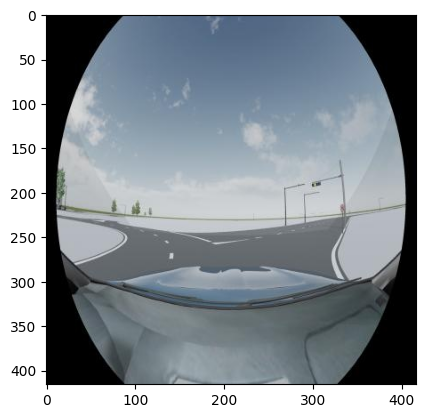

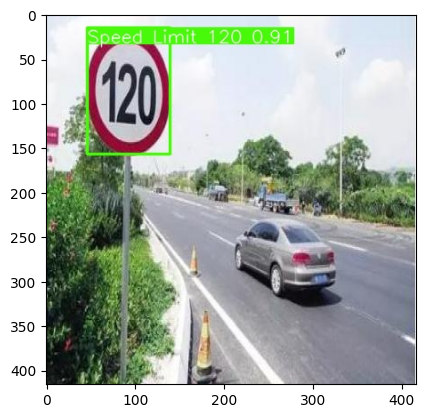

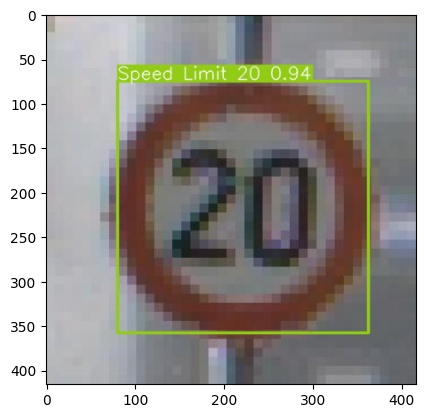

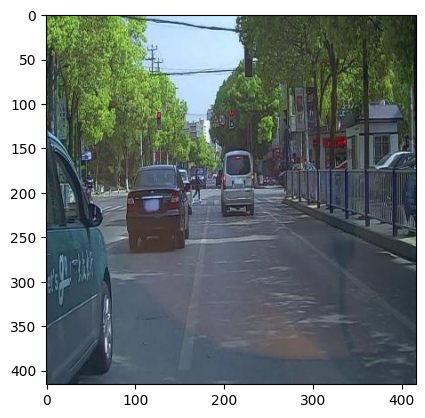

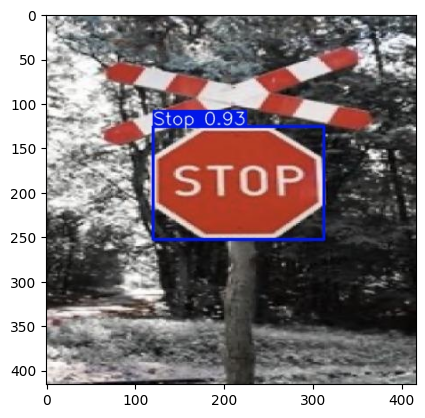

In [102]:
for i in range(1, 12):
    plt.imshow(plt.imread(f'/runs/detect/train{i}/image0.jpg'))
    plt.show()